### 1. Введение.
#### i. Для начала, пожалуйста, приведите 5 примеров применения методов машинного обучения в жизни. В чём преимущество использования методов машинного обучения в каждом из ваших примеров?
1. Определение наличия либо отстуствия болезни. (Классификация)
2. Предсказание цен акций компании. (Регрессия)
3. Разбиение клиентов на категории. (Кластеризация)
4. Подбор закупки товаров для магазина. (Ассоциация)
5. Работа с изображениями и видео (Сжатие). (Уменьшение размерности или обобщение)
#### ii. Используйте классификацию задач, представленную во введении, чтобы определить, к какому классу можно отнести задачи из приведённой выше таблицы и 5 приведённых вами примеров.
1. Спрогнозируйте цену дома. (Регрессия)
2. Предскажите, вернёт ли клиент кредит. (Классификация, Регрессия)
3. Прогнозирование времени приёма лекарств пациентом. (Регрессия)
4. Выберите, какое из доступных лекарств следует дать пациенту. (Классификация)
5. Выберите сегмент клиентов для рекламной коммуникации. (Классификация, Кластеризация, Ассоциация, Уменьшение размерности)
6. Распознавание бракованной продукции на производственной линии (на основе фотосканов). (Классификация)
7. Решите, как разместить товары на полке в магазине. (Ассоциация, Кластеризация)
8. Поиск сайтов для ввода текстового запроса. (Ассоциация, Кластеризация, Классификация)
9. Разделите клиентов магазина на сегменты, чтобы понять, чем отличается их поведение. (Кластеризация, Уменьшение размерности)
10. Обнаружение аномалий в трафике сайта. (Классификация)
11. 
#### iii. Подумайте, в чём разница между мультиклассовой и мультилейблевой классификацией.
Мультилейблевая классификация, в отличие от мультиклассовой, может присвоить обьект одновременно к нескольким классам. В наборе данных мультилейблевой классификации содержится несколько полей меток класса, а в мультиклассовой - одно.
#### iv. Является ли пример с ценами на жильё из теории классификацией задачи регрессии? Можно ли свести задачу регрессии к задаче классификации?
Да этот пример можно отнести к задаче регрессии если мы хотим точно спрогнозировать цену, однако, его можно сделать задачей классификации если мы разделим цену на классы например: 1-ый класс (0 - 1,000,000), 2-ой класс (1,000,000 - 5,000,000), 3-ий класс 
(более 5,000,000). Теперь это задача мультиклассовой классификации.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_train = pd.read_json('data/train.json')

print(f'Кол-во строк и столбцов: {df_train.shape}\n')
print(df_train.columns, '\n')
print('Целевой столбец - price')

Кол-во строк и столбцов: (49352, 15)

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object') 

Целевой столбец - price


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Нет пропущенных значений все столбцы заполненны

In [67]:
df_train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


в оновном квартиры обычные (не огромные) с одной ванной, одной спальней

In [68]:
df_train.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


кол-во ванных и спален влияет на цену больше чем остальные численные факторы

In [69]:
df = df_train[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


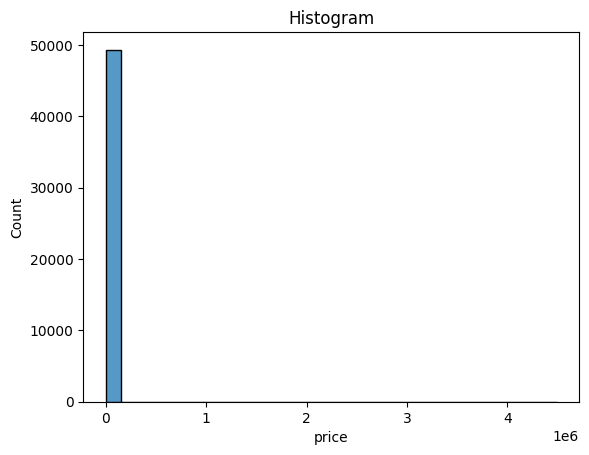

In [70]:
sns.histplot(data=df, x='price', bins=30)
plt.title("Histogram");

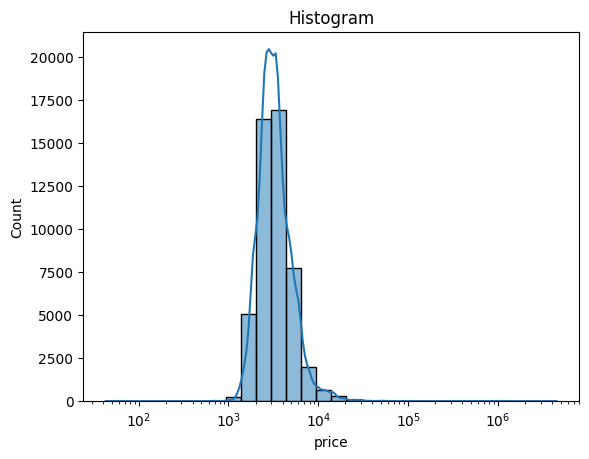

In [71]:
sns.histplot(data=df, x='price', bins=30, log_scale=True, kde=True)
plt.title("Histogram");

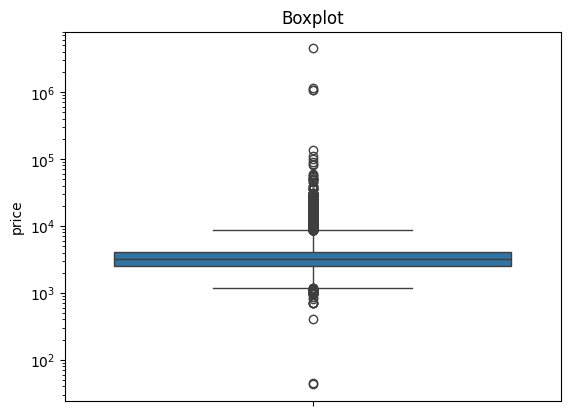

In [72]:
sns.boxplot(data=df, y='price', log_scale=True);
plt.title("Boxplot");

In [73]:
lower_bound = df['price'].quantile(0.01)
upper_bound = df['price'].quantile(0.99)
df = df[(df['price']>lower_bound) & (df['price']<upper_bound)]

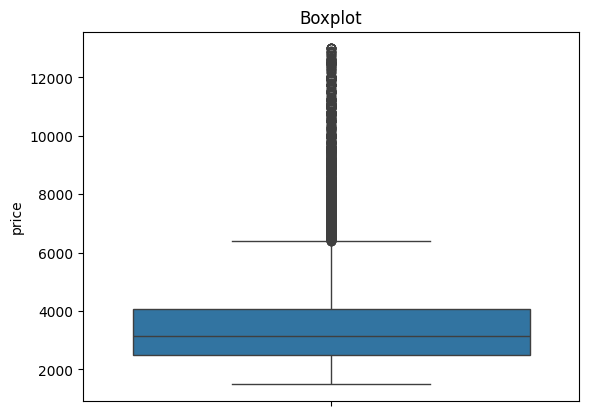

In [74]:
sns.boxplot(data=df, y='price');
plt.title("Boxplot");

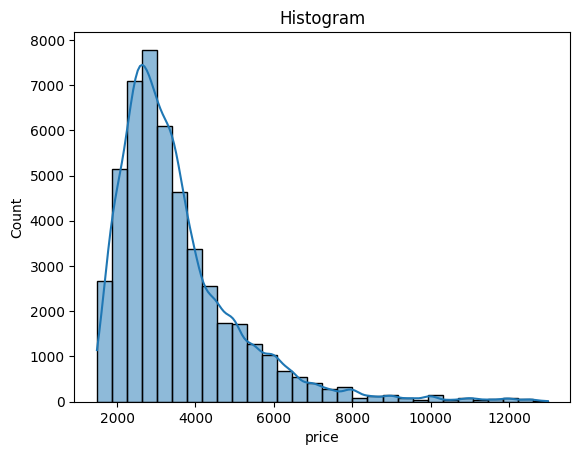

In [75]:
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Histogram");

мы убрали часть выбросов из-за этого ящик перестал сплющиваться от большого разброса чисел, и для гистограммы нам тепер ь не нужна логарифмическая шкала, распредеелние стало более понятным визуально

In [76]:
df['interest_level'].astype("category").cat.codes
df['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

In [77]:
df['interest_level'] = df['interest_level'].replace({
    'low': 0,
    'medium': 1, 
    'high': 2
})
df['interest_level'].value_counts()

C:\Users\slavc\AppData\Local\Temp\ipykernel_9072\615124677.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['interest_level'] = df['interest_level'].replace({
C:\Users\slavc\AppData\Local\Temp\ipykernel_9072\615124677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_level'] = df['interest_level'].replace({


interest_level
0    33672
1    11114
2     3557
Name: count, dtype: int64

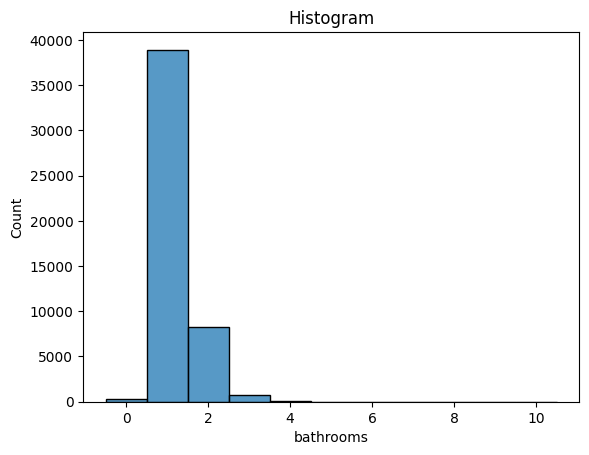

In [78]:
sns.histplot(data=df, x='bathrooms',discrete=True)
plt.title("Histogram");

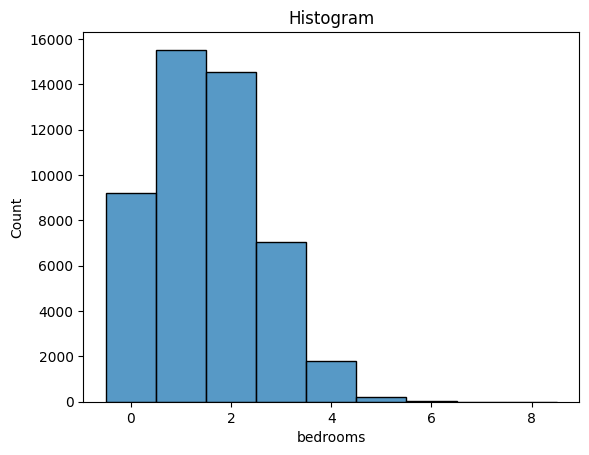

In [79]:
sns.histplot(data=df, x='bedrooms',discrete=True)
plt.title("Histogram");

выбросы есть, например, кол-во ванных от 5 до 10 совсем не видно на гистограмме, однако такие значения присутствуют

In [80]:
correlation_matrix = df.corr()
correlation_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


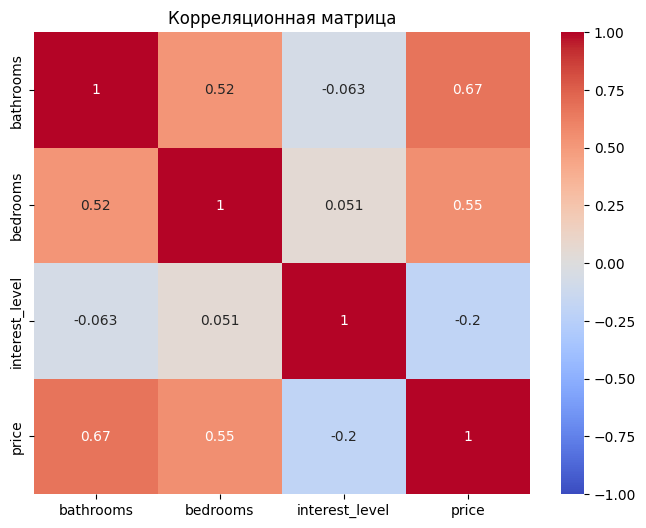

In [81]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  
plt.title('Корреляционная матрица')
plt.show()  

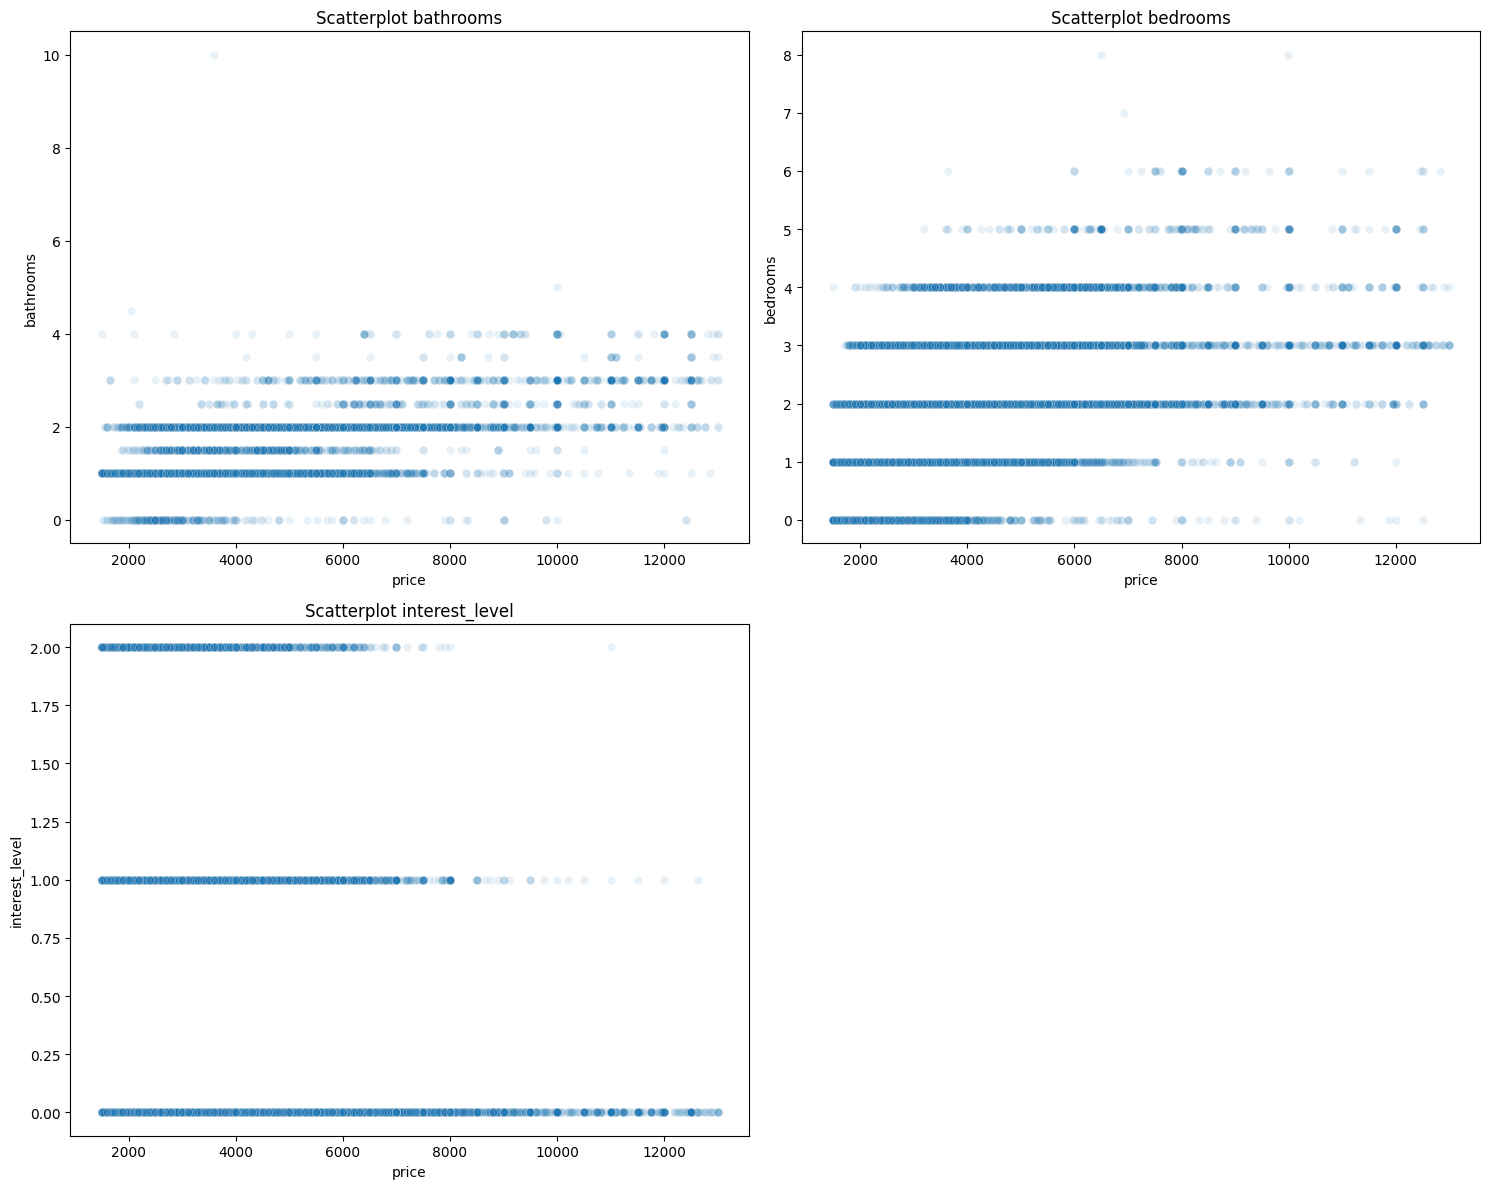

In [82]:
plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='price', y='bathrooms', alpha=0.1)
plt.title("Scatterplot bathrooms");

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='price', y='bedrooms', alpha=0.1)
plt.title("Scatterplot bedrooms");

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='price', y='interest_level', alpha=0.1)
plt.title("Scatterplot interest_level");
plt.tight_layout()

In [83]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [84]:
dfcopy = df.copy()

In [85]:
dfcopy['bathrooms_squared'] = dfcopy['bathrooms']**2
dfcopy['bedrooms_squared'] = dfcopy['bedrooms']**2
dfcopy['interest_level_squared'] = dfcopy['interest_level']**2
correlation_matrix_dfcopy = dfcopy.corr()
correlation_matrix_dfcopy

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
bathrooms,1.000000,0.517200,-0.062819,0.670808,0.955906,0.548426,-0.058710
bedrooms,0.517200,1.000000,0.051282,0.547310,0.478497,0.928282,0.040125
interest_level,-0.062819,0.051282,1.000000,-0.199652,-0.067757,0.047048,0.943959
price,0.670808,0.547310,-0.199652,1.000000,0.646949,0.544612,-0.182283
bathrooms_squared,0.955906,0.478497,-0.067757,0.646949,1.000000,0.521951,-0.061563
bedrooms_squared,0.548426,0.928282,0.047048,0.544612,0.521951,1.000000,0.036408
interest_level_squared,-0.058710,0.040125,0.943959,-0.182283,-0.061563,0.036408,1.000000


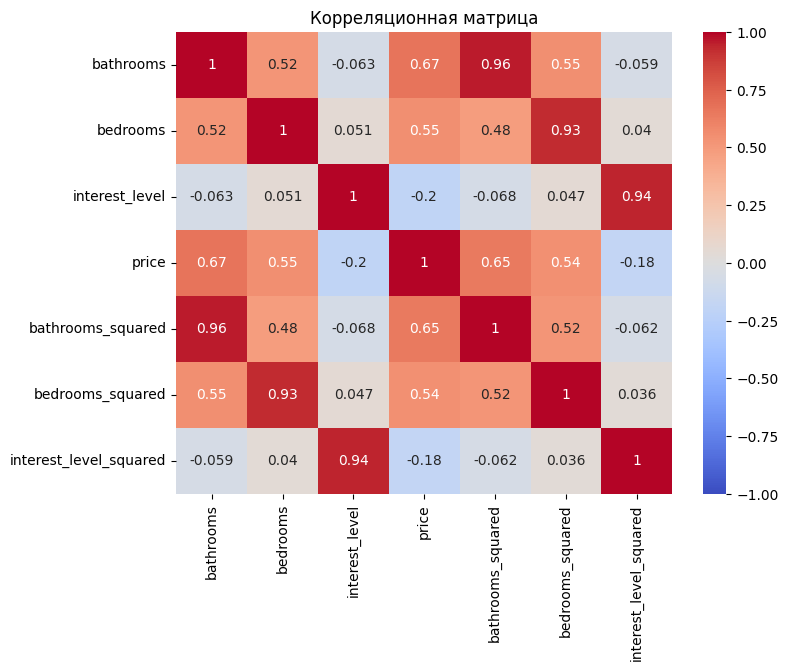

In [86]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix_dfcopy, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  
plt.title('Корреляционная матрица')
plt.show()  

In [87]:
X_train = df[['bathrooms', 'bedrooms']]
y_train = df['price']

In [88]:
df_test = pd.read_json('data/test.json')
X_test = df_test[['bathrooms', 'bedrooms']]
y_test = df_test['price']

In [89]:
poly = PolynomialFeatures(degree=10)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [90]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [91]:
X_train = X_poly_train
X_test = X_poly_test
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

lr_mae_train = mean_absolute_error(y_train, y_train_pred_lr)
lr_mae_test = mean_absolute_error(y_test, y_test_pred_lr)
lr_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

new_result_MAE = pd.DataFrame({'model': ['linear_regression'], 
                               'train': [lr_mae_train], 
                               'test': [lr_mae_test]})

new_result_RMSE = pd.DataFrame({'model': ['linear_regression'], 
                                 'train': [lr_rmse_train], 
                                 'test': [lr_rmse_test]})

result_MAE = pd.concat([result_MAE, new_result_MAE])
result_RMSE = pd.concat([result_RMSE, new_result_RMSE], ignore_index=True)

C:\Users\slavc\AppData\Local\Temp\ipykernel_9072\3949315600.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, new_result_MAE])
C:\Users\slavc\AppData\Local\Temp\ipykernel_9072\3949315600.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, new_result_RMSE], ignore_index=True)


In [92]:
dt = DecisionTreeRegressor(random_state=21)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

dt_mae_train = mean_absolute_error(y_train, y_train_pred_dt)
dt_mae_test = mean_absolute_error(y_test, y_test_pred_dt)
dt_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

new_result_MAE = pd.DataFrame({'model': ['decision_tree'], 
                               'train': [dt_mae_train], 
                               'test': [dt_mae_test]})

new_result_RMSE = pd.DataFrame({'model': ['decision_tree'], 
                                 'train': [dt_rmse_train], 
                                 'test': [dt_rmse_test]})

result_MAE = pd.concat([result_MAE, new_result_MAE], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, new_result_RMSE], ignore_index=True)

In [93]:
mean_price = y_train.mean()
y_train_pred_mean = [mean_price] * len(y_train)
y_test_pred_mean = [mean_price] * len(y_test)

mean_mae_train = mean_absolute_error(y_train, y_train_pred_mean)
mean_mae_test = mean_absolute_error(y_test, y_test_pred_mean)
mean_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_mean))
mean_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_mean))

new_result_MAE = pd.DataFrame({'model': ['naive_mean'], 
                               'train': [mean_mae_train], 
                               'test': [mean_mae_test]})

new_result_RMSE = pd.DataFrame({'model': ['naive_mean'], 
                                 'train': [mean_rmse_train], 
                                 'test': [mean_rmse_test]})

result_MAE = pd.concat([result_MAE, new_result_MAE], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, new_result_RMSE], ignore_index=True)

median_price = y_train.median()
y_train_pred_median = [median_price] * len(y_train)
y_test_pred_median = [median_price] * len(y_test)

median_mae_train = mean_absolute_error(y_train, y_train_pred_median)
median_mae_test = mean_absolute_error(y_test, y_test_pred_median)
median_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_median))
median_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_median))

new_result_MAE = pd.DataFrame({'model': ['naive_median'], 
                               'train': [median_mae_train], 
                               'test': [median_mae_test]})

new_result_RMSE = pd.DataFrame({'model': ['naive_median'], 
                                 'train': [median_rmse_train], 
                                 'test': [median_rmse_test]})
result_MAE = pd.concat([result_MAE, new_result_MAE], ignore_index=True)
result_RMSE = pd.concat([result_RMSE, new_result_RMSE], ignore_index=True)

print(result_MAE)
print(result_RMSE)

               model        train          test
0  linear_regression   753.679394  1.391954e+16
1      decision_tree   753.675997  9.539167e+02
2         naive_mean  1134.361473  1.373792e+03
3       naive_median  1082.220859  1.322641e+03
               model        train          test
0  linear_regression  1070.669027  3.803348e+18
1      decision_tree  1070.598967  9.589362e+03
2         naive_mean  1585.609099  9.715381e+03
3       naive_median  1631.719953  9.731481e+03
